In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1) Explore the dataset

In [3]:
# load dataset
pd.set_option('display.max_columns', 42)
dfo= pd.read_csv('home_assignment.csv')
dfo.head()

,subject_number,age,sex,race,dental_floss_user,country,height,weight,mother_history_severe_tooth_problems,father_history_severe_tooth_problems,candy_eating_history,lead_in_largest_cavity_size,lead_in_cavity_really_hurts,lead_in_number_of_cavities,lead_in_size_sum,Monocytes,Hematocrit,"Monocytes, Count","Bilirubin, Total","Eosinophils, Count",Blood Urea Nitrogen (BUN),AST/SGOT,Hemoglobin,Lymphocytes,Glucose,"Neutrophils, Count",Uric Acid,Platelet Count,Neutrophils,Total Lymphocytes,Band Neutrophils,Eosinophils,"Protein, Qual",Alkaline Phosphatase (ALP),Creatinine,ALT/SGPT,Calcium,Basophils,WBC,"Protein, Total",Erythrocytes (RBC),new_cavity
0,5002,27,M,Hispanic / Latin American,False,UK,183,81,False,False,Former candy eater,0.2 - 0.5 mm,True,1,2,3.443333,61.933333,0.26,0.056667,0.533333,29.000000,26.333333,20.0,42.000000,100.666667,9.566667,1.633333,187.666667,59.000000,1.000000,0.333333,4.966667,1.166667,31.566667,7.000000,14.666667,8.433333,0.0,5.42,0.833333,4.866667,True
1,5004,37,F,Hispanic / Latin American,False,UK,166,71,Unknown,Unknown,Current candy eater,0.2 - 0.5 mm,True,1,2,3.673333,53.133333,0.37,0.103333,1.166667,18.500000,12.000000,12.0,45.333333,96.666667,9.366667,2.696667,220.000000,49.666667,1.533333,1.000000,5.366667,0.533333,38.833333,6.866667,15.300000,4.300000,0.0,6.92,0.700000,4.833333,False
2,5007,34,M,Hispanic / Latin American,False,UK,181,85,False,False,Never was a candy eater,0.2 - 0.5 mm,True,1,2,2.900000,52.700000,0.27,0.120000,1.200000,27.000000,30.000000,20.0,42.000000,110.000000,9.700000,2.140000,257.000000,67.000000,2.200000,0.000000,4.900000,0.400000,39.000000,7.000000,14.400000,8.500000,0.0,5.51,1.100000,4.900000,False
3,5008,32,M,Hispanic / Latin American,False,UK,181,79,Unknown,Unknown,Never was a candy eater,<= 0.1 mm,True,2,3,4.303333,64.933333,0.40,0.283333,1.200000,18.333333,14.333333,12.0,46.333333,92.333333,9.500000,1.560000,247.666667,72.333333,4.300000,0.000000,6.033333,0.700000,23.500000,7.066667,15.933333,4.666667,0.0,6.63,0.733333,4.833333,False
4,5010,29,M,Hispanic / Latin American,False,UK,182,87,Unknown,Unknown,Current candy eater,> 1.0 mm,True,3,9,4.556667,66.866667,0.33,0.210000,0.766667,22.000000,25.333333,11.0,45.000000,108.666667,9.500000,1.656667,243.000000,97.666667,3.133333,0.000000,4.933333,0.566667,24.366667,7.500000,15.333333,6.166667,0.0,6.81,0.833333,5.266667,False


In [4]:
# Value types & missing values
datadict = pd.DataFrame(dfo.dtypes)
datadict['Missing']=dfo.isnull().sum()
datadict

,0,Missing
subject_number,int64,0
age,int64,0
sex,object,0
race,object,0
dental_floss_user,bool,0
country,object,0
height,int64,0
weight,int64,0
mother_history_severe_tooth_problems,object,0
father_history_severe_tooth_problems,object,0


Group 3 (lab results) has a few missing values. we'll need to address those later on. 

### Descriptive statistics & Visualization

In [5]:
# factorial 
dfo.describe(include=['object','bool'])

,sex,race,dental_floss_user,country,mother_history_severe_tooth_problems,father_history_severe_tooth_problems,candy_eating_history,lead_in_largest_cavity_size,lead_in_cavity_really_hurts,new_cavity
count,839,839,839,839,839,839,839,839,839,839
unique,2,5,2,32,3,3,3,5,1,2
top,M,Hispanic / Latin American,False,SG,False,False,Never was a candy eater,<= 0.1 mm,True,False
freq,569,749,696,197,410,418,396,350,839,421


- As we saw before, no missing values for feature group 1 & 2.
- We'll norice parents history has 3 values (+'unknown') .
- Our subjects are mostly Males (~70%), Hispanic/LATAM (~90%) not having the habbit of flossing (~80%). 
- 'new_cavity' is ~50% -> half our subject ended with new cavities after 3 years. 

In [6]:
# Numeric
dfo.describe(include=['number'])

,subject_number,age,height,weight,lead_in_number_of_cavities,lead_in_size_sum,Monocytes,Hematocrit,"Monocytes, Count","Bilirubin, Total","Eosinophils, Count",Blood Urea Nitrogen (BUN),AST/SGOT,Hemoglobin,Lymphocytes,Glucose,"Neutrophils, Count",Uric Acid,Platelet Count,Neutrophils,Total Lymphocytes,Band Neutrophils,Eosinophils,"Protein, Qual",Alkaline Phosphatase (ALP),Creatinine,ALT/SGPT,Calcium,Basophils,WBC,"Protein, Total",Erythrocytes (RBC)
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,794.000000,794.000000,794.000000,794.000000,839.000000,839.000000,839.000000,838.000000,839.000000,839.000000,839.000000,794.000000,835.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,821.000000,839.000000,839.000000,839.000000
mean,5779.381406,33.249106,175.833135,81.053635,2.405244,4.290822,4.539823,62.496196,0.392630,0.142379,0.806658,25.041324,25.731816,16.062688,43.318808,103.551218,9.537816,2.033576,251.360451,73.377243,2.539678,0.430121,6.374824,0.847521,35.870081,7.992173,16.470142,9.405078,0.085124,10.035395,1.818453,7.192116
std,458.135291,6.627034,9.153728,15.816843,1.756752,2.544365,1.361530,7.294896,0.113179,0.083046,0.790560,8.410855,12.822204,4.826097,3.495503,26.680467,0.735226,0.589951,58.653461,21.380703,5.335765,1.822643,9.496603,1.124323,73.906148,4.849046,11.791504,24.391384,0.979509,59.502335,6.473569,47.620149
min,5002.000000,14.000000,133.000000,42.000000,1.000000,0.000000,1.803333,38.500000,0.120000,0.010000,0.000000,12.333333,6.600000,2.160000,32.000000,1.620000,5.121518,0.770000,80.000000,26.000000,0.016667,0.000000,0.000000,0.200000,1.035000,5.650000,10.233333,2.766667,0.000000,3.415000,0.500000,3.000000
25%,5380.500000,29.000000,170.000000,71.000000,1.000000,2.000000,3.573333,57.608333,0.315000,0.086667,0.550000,19.666667,17.333333,13.000000,41.000000,91.666667,9.366667,1.624167,213.333333,60.416667,1.266667,0.000000,4.700000,0.466667,23.950000,7.066667,13.966667,5.133333,0.000000,5.897500,0.833333,4.600000
50%,5769.000000,34.000000,176.000000,80.000000,2.000000,4.000000,4.320000,62.800000,0.380000,0.124167,0.733333,23.333333,22.000000,15.333333,43.333333,99.666667,9.633333,1.976667,246.333333,70.000000,1.800000,0.000000,5.466667,0.633333,28.850000,7.333333,14.833333,6.133333,0.000000,6.956667,0.933333,4.870000
75%,6169.500000,38.000000,183.000000,90.000000,3.000000,5.000000,5.270000,67.541667,0.454583,0.170000,0.933333,27.583333,30.333333,18.333333,45.666667,110.333333,9.866667,2.363125,285.500000,81.500000,2.500000,0.291667,6.275000,0.850000,33.741667,7.633333,15.683333,7.100000,0.000000,8.135000,1.066667,5.133333
max,6633.000000,54.000000,206.000000,142.000000,12.000000,20.000000,10.010136,83.300000,0.847273,0.542648,10.396087,63.776137,79.639721,35.911822,53.666667,212.114641,10.833333,4.425837,486.109735,172.050722,58.274966,13.985825,108.847740,8.869304,784.535814,43.777318,95.609109,189.798677,12.470739,1226.072452,49.745792,980.753614


Some stats on our subjects: <br>
avg age is 33. median height of 176, weight 80 (by Google'normal' weight for M of 175 is ~70 . so poissbly our subjects are a bit fat)
num of cavities (at the begining of the trial) avg 2.4, 75% percentile is 3. long tail with max 12. 


### Exploratory for feature groups 1+2 

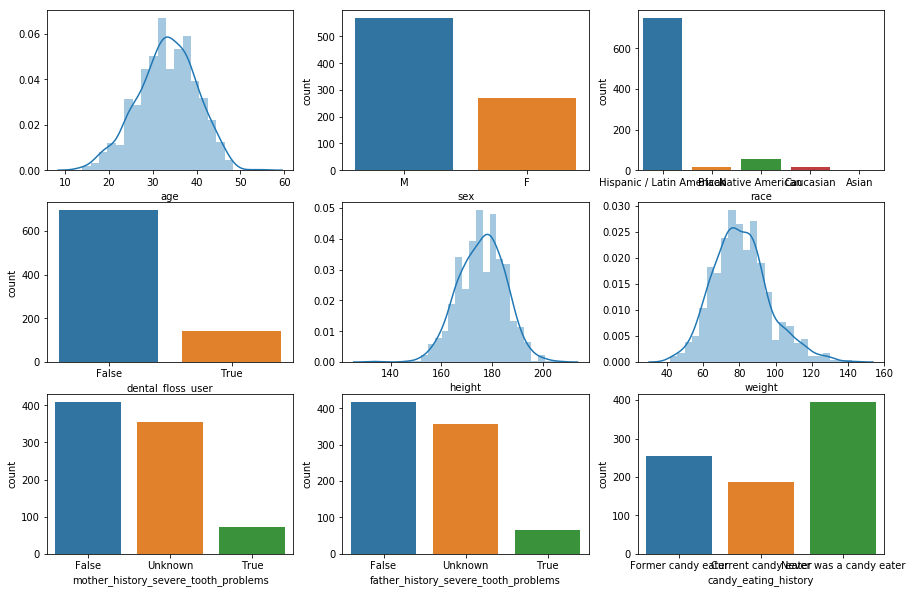

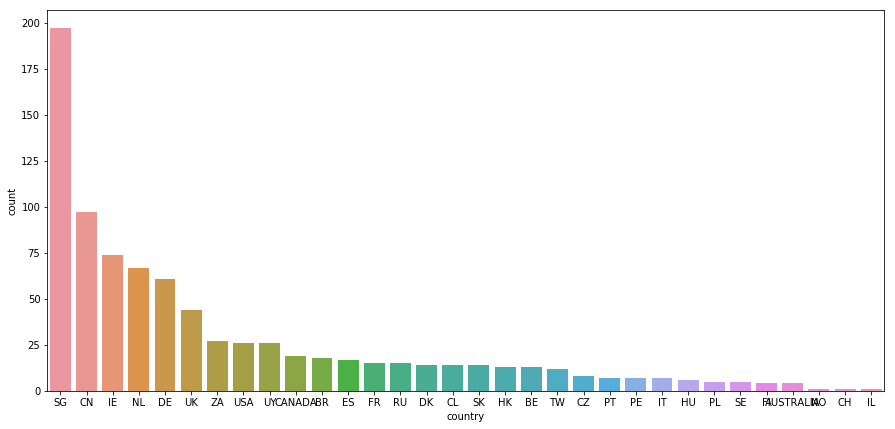

In [7]:
fig, axes = plt.subplots(3, 3,figsize=(15, 10))
#sns.countplot('new_cavity',data=dfo,ax=axes[0,0])
sns.distplot(dfo['age'], kde=True,ax=axes[0,0]) 
sns.countplot('sex',data=dfo,ax=axes[0,1])
sns.countplot('race',data=dfo,ax=axes[0,2])
#axes[1,1].set_xticklabels([1,2,3,4,5]) #trying to fix labels for race 
sns.countplot('dental_floss_user',data=dfo,ax=axes[1,0])
sns.distplot(dfo['height'], kde=True, ax=axes[1,1])
sns.distplot(dfo['weight'], kde=True, ax=axes[1,2])
sns.countplot('mother_history_severe_tooth_problems',data=dfo,ax=axes[2,0])
sns.countplot('father_history_severe_tooth_problems',data=dfo,ax=axes[2,1])
sns.countplot('candy_eating_history',data=dfo,ax=axes[2,2])


#plt.figure()
plt.subplots(figsize=(15,7))
sns.countplot(x='country', data=dfo,order = dfo['country'].value_counts().index)
# sns.countplot('Embarked',data=train,ax=axes[1,1])
# sns.distplot(train['Age'].dropna(),kde=True,ax=axes[1,3])

*Distributions observations from visualization :*

- Age - normaliy distributed, centered around 33
- Height is a bit skewed right from center . Weight has a bit of a right tail 
- Mother & father tooth problems are similar in their distribution 
- Country: very long tale, we'd want to group. possibly by region & social-economic. 

** Feature creation/ modify**

In [8]:
# 1) CountryGroupCode - group country by region & social economic
COUNTRY_GR_1 = set(['SG']) 
COUNTRY_GR_2 = set(['BE','CANADA','CH','DE','DK','FI','FR','NL','NO','SE','AUSTRALIA']) #good
COUNTRY_GR_3 = set(['BR','CL','CN','ES','HU','PE','PL','PT','RU','SK','UY']) #lame
COUNTRY_GR_4 = set(['CZ','IE','IL','IT','UK','USA','ZA']) # medium
COUNTRY_GR_5 = set(['HK','TW']) #FarEast

dfo["CountryGroupCode"] = '0'
dfo['country'].isin(COUNTRY_GR_1)

dfo.loc[dfo['country'].isin(COUNTRY_GR_1), "CountryGroupCode"] = '1'
dfo.loc[dfo['country'].isin(COUNTRY_GR_2), "CountryGroupCode"] = '2'
dfo.loc[dfo['country'].isin(COUNTRY_GR_3), "CountryGroupCode"] = '3'
dfo.loc[dfo['country'].isin(COUNTRY_GR_4), "CountryGroupCode"] = '4'
dfo.loc[dfo['country'].isin(COUNTRY_GR_5), "CountryGroupCode"] = '5'

dfo['CountryGroupCode'].value_counts()

3    226
2    204
1    197
4    187
5     25
Name: CountryGroupCode, dtype: int64

In [9]:
# 2) BMI - instead of height & weight, we could define BMI into one feature 
dfo['BMI']=dfo['weight']/(dfo['height']/100)**2

#### Marginal distributions 
Given a single X, what's the probability of new cavity?
difference in probability between the X values indicates it has effect on the probability for new cavity . those that are not indicative  we'll consider excluding from our model


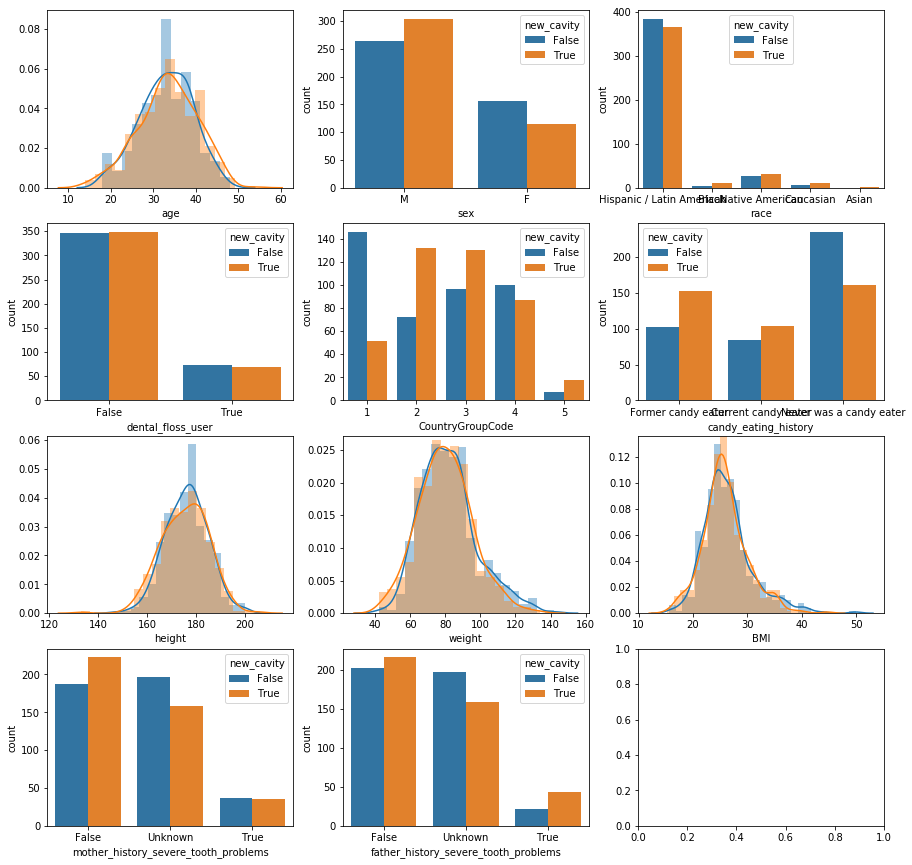

In [10]:
fig, axes = plt.subplots(4, 3,figsize=(15, 15))

sns.distplot(dfo[dfo['new_cavity']==True]['age'],ax=axes[0,0])  
sns.distplot(dfo[dfo['new_cavity']==False]['age'],ax=axes[0,0]) 
sns.countplot('sex',data=dfo,hue='new_cavity', ax=axes[0,1])
sns.countplot('race',data=dfo,hue='new_cavity',ax=axes[0,2])
#axes[1,1].set_xticklabels([1,2,3,4,5]) #trying to fix labels for race 
sns.countplot('dental_floss_user',hue='new_cavity',data=dfo,ax=axes[1,0])
sns.countplot('CountryGroupCode',data=dfo,hue='new_cavity',ax=axes[1,1])
sns.countplot('candy_eating_history',hue='new_cavity',data=dfo,ax=axes[1,2])
sns.distplot(dfo[dfo['new_cavity']==True]['height'], kde=True, ax=axes[2,0])
sns.distplot(dfo[dfo['new_cavity']==False]['height'], kde=True, ax=axes[2,0])
sns.distplot(dfo[dfo['new_cavity']==True]['weight'], kde=True, ax=axes[2,1])
sns.distplot(dfo[dfo['new_cavity']==False]['weight'], kde=True, ax=axes[2,1])
sns.distplot(dfo[dfo['new_cavity']==True]['BMI'], kde=True, ax=axes[2,2])
sns.distplot(dfo[dfo['new_cavity']==False]['BMI'], kde=True, ax=axes[2,2])
sns.countplot('mother_history_severe_tooth_problems',hue='new_cavity',data=dfo,ax=axes[3,0])
sns.countplot('father_history_severe_tooth_problems',hue='new_cavity',data=dfo,ax=axes[3,1])


** Observations feature group 1: **
- Age: seems like along age values there isn't a distinct differentiation for new cavity. hard to believe age insn't indicative so we might want to keep it anyway, or with interaction
- Sex: we see different probabilities for male & female for new cavity (53% vs 42%. 10% diff is substential). this suggests that gender is indicative
- Race: doesn't seem like there's much difference in probability for the groups of race (hispanic, main group around 50:50) - this might not be an indicative feature
- Floss user: given you use floss doesn't seem to effect cavity creation (weird!) this is since the prob is ~50% rather you use floss or not. thus we might want to drop this feature
- Country Code: we can clearly see difference in new cavity prob between the country code groups. good new feature
- Candy eating history: ditto
- Height, weight & BMI : in the center values of hight it looks like there's better chance for new cavity , while for wieght there seems to be no difference. one would think weight might be somewhat indicative. however, weight is relative to hight. looking at BMI we see better chances of not having new cavity at the center values. we'll keep this feature. 
- given parents dental history- it looks like parents dental history have effect on their childern's dental habbits with prob differences between the levels of both mother & father.

In [11]:
## numbers for the plots above: 
#dfo.groupby(['sex','new_cavity']).size().groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
#dfo.groupby(['race','new_cavity']).size().groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
#dfo.groupby(['CountryGroupCode','new_cavity']).size().groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

drop_list=['race','dental_floss_user']

*Interaction for Age & Sex, to explore combined effect possibility: *

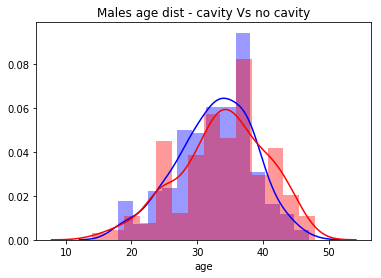

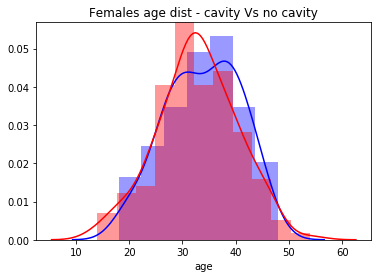

In [12]:
plt.figure()
plt.title('Males age dist - cavity Vs no cavity')
sns.distplot(dfo[(dfo['new_cavity']==True) & (dfo['sex']== 'M')]['age'],color='Blue')
sns.distplot(dfo[(dfo['new_cavity']==False) & (dfo['sex']== 'M')]['age'],color='Red')
plt.figure() 
plt.title('Females age dist - cavity Vs no cavity')
sns.distplot(dfo[(dfo['new_cavity']==True) & (dfo['sex']== 'F')]['age'],color='Blue')
sns.distplot(dfo[(dfo['new_cavity']==False) & (dfo['sex']== 'F')]['age'],color='Red')


Given gender, we now see a difference along age values in new cavity. among males, those with new_cavity are younger (below 40), while among females it's the older ones (above 35) so the interaction is indicative. <br>

We could have many  such combinations , providing information and potentially improving our prediction. 
including interactions in our model, could substentially increase p (number of features) that could result in over fitting with p~n 

**Group 2 - dental work at trial initiation**

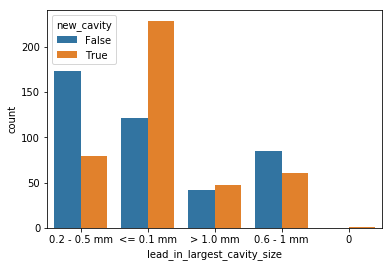

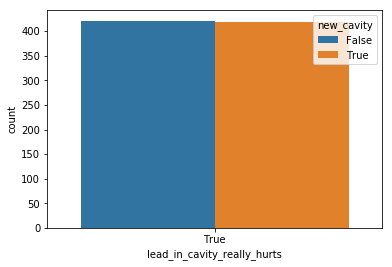

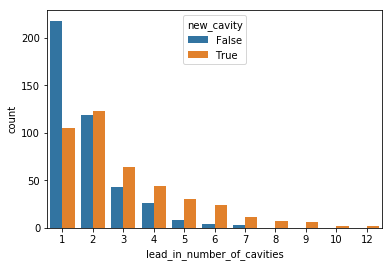

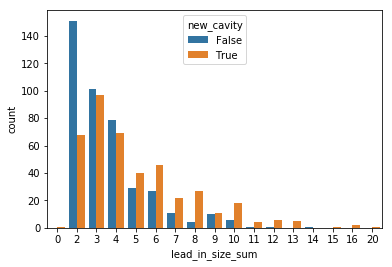

In [13]:
plt.figure()
sns.countplot('lead_in_largest_cavity_size',data=dfo,hue='new_cavity')
plt.figure()
sns.countplot('lead_in_cavity_really_hurts',data=dfo,hue='new_cavity') 
plt.figure()
sns.countplot('lead_in_number_of_cavities',data=dfo,hue='new_cavity') 
plt.figure()
sns.countplot('lead_in_size_sum',data=dfo,hue='new_cavity') 

**Observations group 2**:
- lead in large cavity size (how big the biggest hole is) : this feature is definately indicative. we'll also notice the big diff for the <0.1mm group .small holes more prone to new cavities. we could change to indicator (more convinient)
- lead in cavity really hurts: everyone's a crybaby. dropthis
- lead in number of cavities : good one! as #holes increases, so is the prob to have new cavities
- lead in size sum is similar to 'lead in number of cavities'. we could potentially drop this. 

In [14]:
# 'lead in cavity really hurts' to drop list
drop_list=['race','dental_floss_user','lead_in_cavity_really_hurts']

# Create indicator for lead size 
dfo['lead_in_largest_cavity_I']=([1 if x == '<= 0.1 mm' else 0 for x in dfo['lead_in_largest_cavity_size']])

dfo[['lead_in_largest_cavity_I','lead_in_largest_cavity_size']].head()

,lead_in_largest_cavity_I,lead_in_largest_cavity_size
0,0,0.2 - 0.5 mm
1,0,0.2 - 0.5 mm
2,0,0.2 - 0.5 mm
3,1,<= 0.1 mm
4,0,> 1.0 mm


### Exploratory for feature group 3 - Lab results

#### Missing values handling:  

In [15]:
#Missing values :

g3= dfo.iloc[:,15:dfo.columns.get_loc("Erythrocytes (RBC)")+1] # g3 df for G3 feature group
g3_mvf= g3.fillna(g3.mean()) #complete missing values with avg
g3_mvf.head(10) # Group 3 

,Monocytes,Hematocrit,"Monocytes, Count","Bilirubin, Total","Eosinophils, Count",Blood Urea Nitrogen (BUN),AST/SGOT,Hemoglobin,Lymphocytes,Glucose,"Neutrophils, Count",Uric Acid,Platelet Count,Neutrophils,Total Lymphocytes,Band Neutrophils,Eosinophils,"Protein, Qual",Alkaline Phosphatase (ALP),Creatinine,ALT/SGPT,Calcium,Basophils,WBC,"Protein, Total",Erythrocytes (RBC)
0,3.443333,61.933333,0.260000,0.056667,0.533333,29.000000,26.333333,20.000000,42.000000,100.666667,9.566667,1.633333,187.666667,59.000000,1.000000,0.333333,4.966667,1.166667,31.566667,7.000000,14.666667,8.433333,0.0,5.42,0.833333,4.866667
1,3.673333,53.133333,0.370000,0.103333,1.166667,18.500000,12.000000,12.000000,45.333333,96.666667,9.366667,2.696667,220.000000,49.666667,1.533333,1.000000,5.366667,0.533333,38.833333,6.866667,15.300000,4.300000,0.0,6.92,0.700000,4.833333
2,2.900000,52.700000,0.270000,0.120000,1.200000,27.000000,30.000000,20.000000,42.000000,110.000000,9.700000,2.140000,257.000000,67.000000,2.200000,0.000000,4.900000,0.400000,39.000000,7.000000,14.400000,8.500000,0.0,5.51,1.100000,4.900000
3,4.303333,64.933333,0.400000,0.283333,1.200000,18.333333,14.333333,12.000000,46.333333,92.333333,9.500000,1.560000,247.666667,72.333333,4.300000,0.000000,6.033333,0.700000,23.500000,7.066667,15.933333,4.666667,0.0,6.63,0.733333,4.833333
4,4.556667,66.866667,0.330000,0.210000,0.766667,22.000000,25.333333,11.000000,45.000000,108.666667,9.500000,1.656667,243.000000,97.666667,3.133333,0.000000,4.933333,0.566667,24.366667,7.500000,15.333333,6.166667,0.0,6.81,0.833333,5.266667
5,3.685000,58.450000,0.350000,0.240000,0.900000,20.000000,14.500000,13.250000,40.500000,76.500000,9.525000,1.985000,277.500000,56.000000,3.750000,0.000000,5.500000,0.250000,31.450000,7.150000,13.250000,4.250000,0.0,6.31,0.850000,4.500000
6,6.543333,73.333333,0.450000,0.156667,0.500000,29.500000,26.500000,17.333333,40.666667,107.333333,9.000000,1.696667,280.000000,78.000000,1.833333,0.000000,5.000000,0.966667,19.333333,7.266667,13.600000,5.733333,0.0,8.89,0.833333,4.733333
7,3.826667,66.300000,0.273333,0.136667,0.366667,18.500000,20.500000,15.333333,39.000000,107.666667,9.000000,1.540000,239.333333,70.500000,2.333333,0.000000,4.833333,0.500000,26.200000,6.866667,13.066667,3.600000,0.0,5.80,0.766667,4.566667
8,5.505000,73.400000,0.335000,0.130000,0.500000,21.500000,31.000000,19.333333,48.500000,86.500000,9.600000,1.480000,277.500000,84.000000,1.800000,0.000000,4.450000,0.500000,19.900000,7.166667,16.300000,6.266667,0.0,7.49,1.366667,5.300000
9,4.126667,65.066667,0.400000,0.066667,0.966667,20.666667,19.000000,14.666667,40.000000,108.000000,9.600000,1.683333,411.333333,47.000000,1.066667,0.000000,6.300000,0.433333,26.633333,7.633333,13.866667,4.900000,0.0,6.34,0.633333,4.466667


#### Visualization 
Since we don't really know the meaning of these columns, lets just look at their correlations:

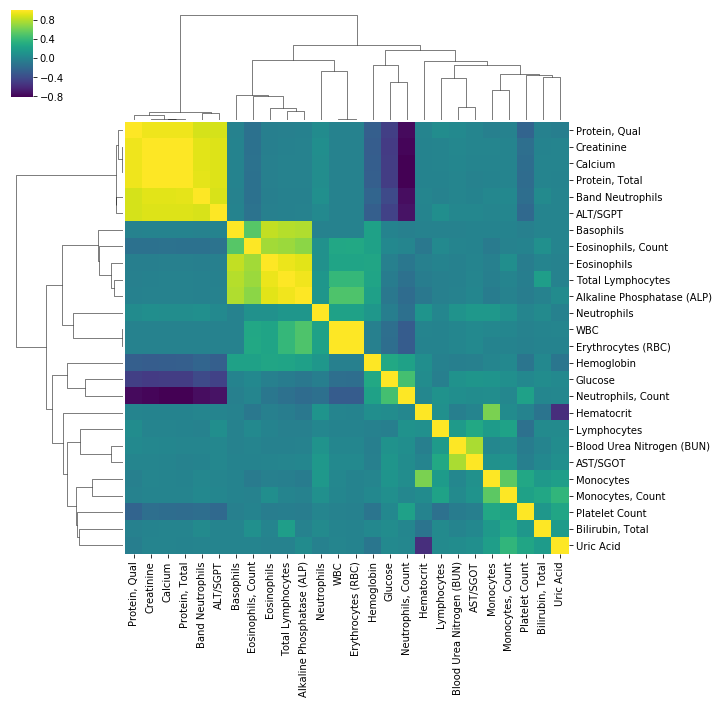

In [16]:
# corr heat map :
sns.clustermap(g3_mvf.corr(),cmap='viridis')

the columns are correlated if they are close to 1 (yellow) or -1 (dark blue)
we can see many columns are correlated. i.e:
    - Neutrophils,count with Protein,Qual & count - opposite vector directions (dark left row/dark right top column)
    - Creatinine to Calcium - same direction (top left yellow square)
    
Potentially we'd want to reduce to the 'base' vectors. dropping the dependent vectors. but...we don't know which to remove..we'll try PCA to reduce the dimenssion <br>

** PCA to group 3**:<br>
__[reference](https://www.theanalysisfactor.com/tips-principal-component-analysis/)__
*PCA needs the DS standerdized (same scale). alternatively we could use the vcov mat .
each column has it's eigenvalue calculated , representing how much variance it explains. if a column has an eigenvalue of 2.5, it explains as much variance as 2.5 of the original variablesv. k=2 is selecting the first two columns with the highest eigenvalues*

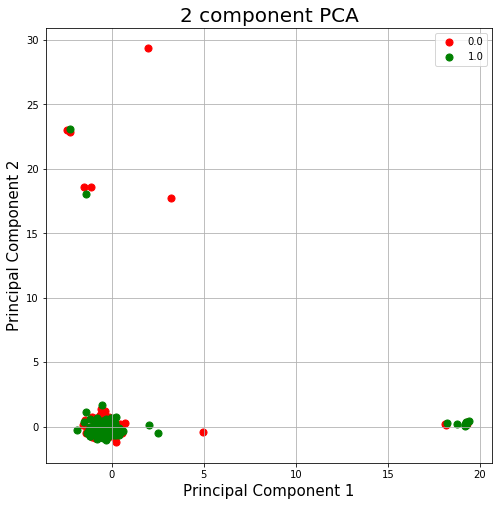

In [17]:
from sklearn.decomposition import PCA
# standerdized 
g3_mvf_s = (g3_mvf-g3_mvf.mean())/g3_mvf.std()

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(g3_mvf_s)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dfo[['new_cavity']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0,1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['new_cavity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

A good PCA reduction would show differentiation between the 1/0 cavity. this didn't work . we'll go back to the original data and explore it

** Marginal distribution for group 3**

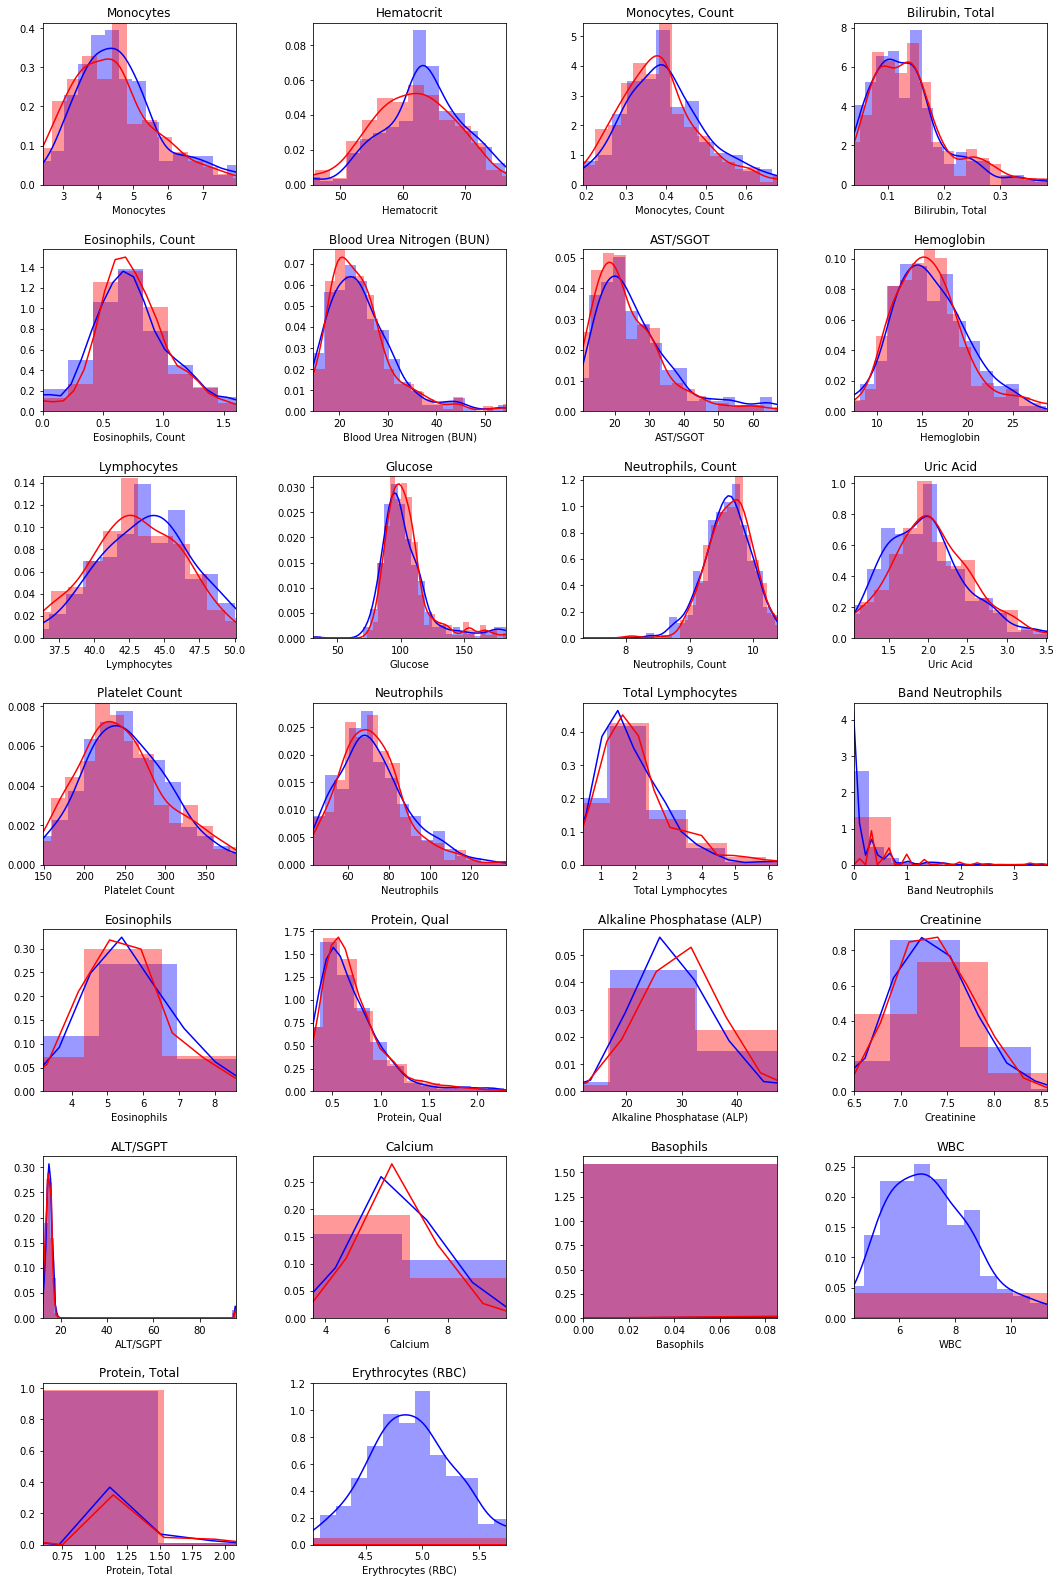

In [18]:
fnames= list(g3_mvf)
q0_1 = g3_mvf.quantile(q = 0.02)
q0_9 = g3_mvf.quantile(q = 0.98)

fig = plt.figure(figsize = (18,28))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, 26):
    plt.subplot(7, 4, i+1)
    sns.distplot(g3_mvf[dfo['new_cavity']==True][fnames[i]],color =  'blue').set_title(fnames[i])
    sns.distplot(g3_mvf[dfo['new_cavity']==False][fnames[i]],color =  'red').set_title(fnames[i])
    plt.xlim(q0_1[i], q0_9[i])

** Log transformation **  <br>
In some of the plots it's difficult to see the disctributions. i'll do a log transformation to reduce the skewness and reduce scale differences

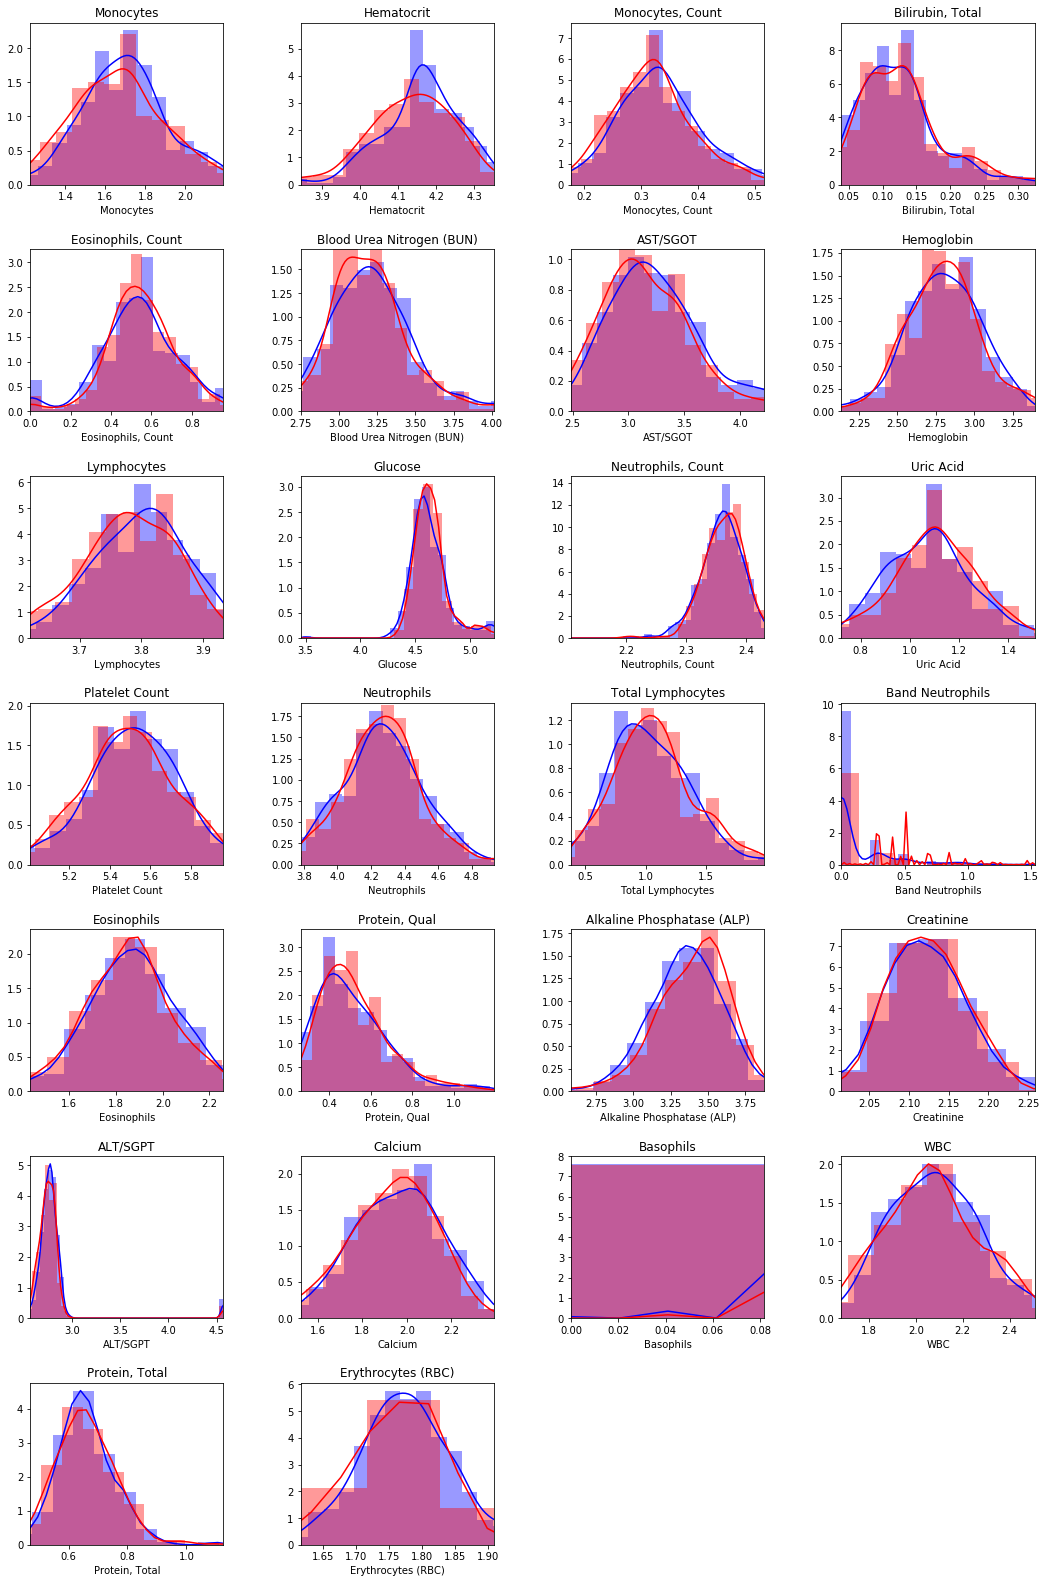

In [19]:
# Log transformation  
g3f_l= (g3_mvf+1).apply(np.log)

q0_1 = g3f_l.quantile(q = 0.02)
q0_9 = g3f_l.quantile(q = 0.98)

fig = plt.figure(figsize = (18,28))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, 26):
    plt.subplot(7, 4, i+1)
    sns.distplot(g3f_l[dfo['new_cavity']==True][fnames[i]],color =  'blue').set_title(fnames[i])
    sns.distplot(g3f_l[dfo['new_cavity']==False][fnames[i]],color =  'red').set_title(fnames[i])
    plt.xlim(q0_1[i], q0_9[i])

** Observation group 3:** <br>
Visually looks like the indicative features are (where we see up to certain value having new cavity, *or* no new cavity ): 
- Monocytes & Monocytes,count 
- Hematocrit
- AST/SGOT
- Lymphocytes
- Uric Acid
- Alkaline Phosphatase (ALP)

Oters aren't clear. we'll add them to the drop list

In [20]:
# add to drop list
g3_keep= ['Monocytes','Monocytes, Count','Hematocrit','AST/SGOT','Lymphocytes','Uric Acid','Alkaline Phosphatase (ALP)']
#g3f_l[g3_keep]
g3_drop= list(set(list(g3f_l))-set(g3_keep))

drop_list.extend(g3_drop)
print(drop_list)

['race', 'dental_floss_user', 'lead_in_cavity_really_hurts', 'Band Neutrophils', 'Eosinophils', 'Hemoglobin', 'ALT/SGPT', 'Calcium', 'Basophils', 'Protein, Qual', 'Creatinine', 'Erythrocytes (RBC)', 'Total Lymphocytes', 'Protein, Total', 'Eosinophils, Count', 'Platelet Count', 'WBC', 'Neutrophils, Count', 'Neutrophils', 'Bilirubin, Total', 'Blood Urea Nitrogen (BUN)', 'Glucose']


### Prep DS for modeling 

**1) Base Model dataset** - We'll inaclude group 1+2, group 3 on log scale and the constructed features CountryCode, BMI and indicator for lead_in_largest_cavity. we'll drop the 'original' ones height,weight, country and lead_in_largest_cavity

In [173]:
M_df0 = pd.concat([dfo.iloc[:,0:15],g3f_l,dfo.iloc[:,dfo.columns.get_loc("Erythrocytes (RBC)")+1:]],axis=1)
M_df0=M_df0.drop(['subject_number','country','lead_in_largest_cavity_size','height','weight'],axis=1)
M_df0.dtypes

age                                       int64
sex                                      object
race                                     object
dental_floss_user                          bool
mother_history_severe_tooth_problems     object
father_history_severe_tooth_problems     object
candy_eating_history                     object
lead_in_cavity_really_hurts                bool
lead_in_number_of_cavities                int64
lead_in_size_sum                          int64
Monocytes                               float64
Hematocrit                              float64
Monocytes, Count                        float64
Bilirubin, Total                        float64
Eosinophils, Count                      float64
Blood Urea Nitrogen (BUN)               float64
AST/SGOT                                float64
Hemoglobin                              float64
Lymphocytes                             float64
Glucose                                 float64
Neutrophils, Count                      

Sklearn needs categorical features encoded to dummies before applying (astype('catagory') doesn't work)

In [183]:
# Get dummies for factorial features
pd.set_option('display.max_columns', 100)
M_df0_dummies = pd.get_dummies(M_df0) #by default taking 'object' type
M_df0_dummies.head(3)

,age,dental_floss_user,lead_in_cavity_really_hurts,lead_in_number_of_cavities,lead_in_size_sum,Monocytes,Hematocrit,"Monocytes, Count","Bilirubin, Total","Eosinophils, Count",Blood Urea Nitrogen (BUN),AST/SGOT,Hemoglobin,Lymphocytes,Glucose,"Neutrophils, Count",Uric Acid,Platelet Count,Neutrophils,Total Lymphocytes,Band Neutrophils,Eosinophils,"Protein, Qual",Alkaline Phosphatase (ALP),Creatinine,ALT/SGPT,Calcium,Basophils,WBC,"Protein, Total",Erythrocytes (RBC),new_cavity,BMI,lead_in_largest_cavity_I,sex_F,sex_M,race_Asian,race_Black,race_Caucasian,race_Hispanic / Latin American,race_Native American,mother_history_severe_tooth_problems_False,mother_history_severe_tooth_problems_True,mother_history_severe_tooth_problems_Unknown,father_history_severe_tooth_problems_False,father_history_severe_tooth_problems_True,father_history_severe_tooth_problems_Unknown,candy_eating_history_Current candy eater,candy_eating_history_Former candy eater,candy_eating_history_Never was a candy eater,CountryGroupCode_1,CountryGroupCode_2,CountryGroupCode_3,CountryGroupCode_4,CountryGroupCode_5
0,27,False,True,1,2,1.491405,4.142076,0.231112,0.055119,0.427444,3.401197,3.308107,3.044522,3.761200,4.621699,2.357704,0.968250,5.239982,4.094345,0.693147,0.287682,1.786188,0.773190,3.483289,2.079442,2.751535,2.244250,0.0,1.859418,0.606136,1.769287,True,24.187046,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,37,False,True,1,2,1.541873,3.991450,0.314811,0.098336,0.773190,2.970414,2.564949,2.564949,3.835862,4.581560,2.338596,1.307432,5.398163,3.925268,0.929536,0.693147,1.851076,0.427444,3.684704,2.062634,2.791165,1.667707,0.0,2.069391,0.530628,1.763589,False,25.765713,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0
2,34,False,True,1,2,1.360977,3.983413,0.239017,0.113329,0.788457,3.332205,3.433987,3.044522,3.761200,4.709530,2.370244,1.144223,5.552960,4.219508,1.163151,0.000000,1.774952,0.336472,3.688879,2.079442,2.734368,2.251292,0.0,1.873339,0.741937,1.774952,False,25.945484,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


**Split to train & test** 


In [176]:
from sklearn.model_selection import train_test_split

train1, test1 = train_test_split(M_df0_dummies, test_size=0.2,random_state=1)
Xtrain1= train1.drop('new_cavity',axis=1)
Ytrain1= train1['new_cavity'].values
Xtest1= test1.drop('new_cavity',axis=1)
Ytest1= test1['new_cavity'].values

#### Logistic Regression 

In [232]:
#base model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(Xtrain1, Ytrain1)
Y_pred_test = logreg.predict(Xtest1)
acc_log1_train = round(logreg.score(Xtrain1, Ytrain1) * 100, 2)
acc_log1_test = round(logreg.score(Xtest1, Ytest1) * 100, 2)

# AUC
probs = logreg.predict_proba(Xtest1)[:, 1] #ROC curve 
auc= metrics.roc_auc_score(Ytest1, probs)

print('Accuracy is: {}\nAUC is {}'.format(acc_log1_test,round(auc*100,3)))

Accuracy is: 71.43
AUC is 78.628


**Model evaluation**: <br>
The base model yields accuracy score of 71.43 on the test data , this will be our refrence.<br> 
$Accuracy: \frac{TP+TN}{TP+TN+FP+FN}$ <br> Classification accuracy is the number of correct predictions made as a ratio of all predictions made.the overall predicted accuracy of the model.
we can use acc to evaluate when the class is balanced, such is in our case (see below check) . <br>
AUC- Area under the curve - represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random
another way to evaluate the model performance could be with CV (avg acc) 

In [194]:
# class balance for acc use
test1['new_cavity'].value_counts()

True     84
False    84
Name: new_cavity, dtype: int64

**2) Excluding drop_list** - dropping the features we marked across the analysis as not indicative

In [179]:
#update the drop list for the new structure with dummeis
#print drop_list
#list(M_df0_dummies)

drop_list_2 = ['race_Asian',
 'race_Black',
 'race_Caucasian',
 'race_Hispanic / Latin American',
 'race_Native American','dental_floss_user','lead_in_cavity_really_hurts', 'Band Neutrophils', 'Eosinophils', 'Hemoglobin', 'ALT/SGPT', 'Calcium', 'Basophils', 'Protein, Qual', 'Creatinine', 'Erythrocytes (RBC)', 'Total Lymphocytes', 'Protein, Total', 'Eosinophils, Count', 'Platelet Count', 'WBC', 'Neutrophils, Count', 'Neutrophils', 'Bilirubin, Total', 'Blood Urea Nitrogen (BUN)', 'Glucose']


In [241]:
# create 2nd model DF - train & test
M_df0_dummies_model2 = M_df0_dummies.drop(drop_list_2,axis = 1)
train2, test2 = train_test_split(M_df0_dummies_model2, test_size=0.2,random_state=1)
Xtrain2= train2.drop('new_cavity',axis=1)
Ytrain2= train2['new_cavity'].values
Xtest2= test2.drop('new_cavity',axis=1)
Ytest2= test2['new_cavity'].values

# fit logistic regression 
logreg_2 = LogisticRegression()
logreg_2.fit(Xtrain2, Ytrain2)
Y_pred_test = logreg_2.predict(Xtest2)
acc_log2_train = round(logreg_2.score(Xtrain2, Ytrain2) * 100, 2)
acc_log2_test = round(logreg_2.score(Xtest2, Ytest2) * 100, 2)

# AUC
probs2 = logreg_2.predict_proba(Xtest2)[:, 1] #ROC curve 
auc2= metrics.roc_auc_score(Ytest2, probs2)

print('accuracy is: {}\nAUC is {}'.format(acc_log2_test,round(auc2*100,3)))

accuracy is: 70.24
AUC is 77.82


The 2nd model is lower both in acc and auc. not good.

**3) Sklearn Feature selection** - 2nd model isn't better by acc. we'll try sklearn feature selection from the base model X

In [244]:
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=45)
select.fit(Xtrain1, Ytrain1)
X_train_selected = select.transform(Xtrain1)
X_test_selected = select.transform(Xtest1)


logreg_3 = LogisticRegression()
logreg_3.fit(X_train_selected, Ytrain1)
acc_log3_train = round(logreg_3.score(X_train_selected, Ytrain1) * 100, 2)
acc_log3_test = round(logreg_3.score(X_test_selected, Ytest1) * 100, 2)

# AUC
probs3 = logreg_3.predict_proba(X_test_selected)[:, 1] #ROC curve 
auc3= metrics.roc_auc_score(Ytest1, probs3)

print('accuracy is: {}\nAUC is {}'.format(acc_log3_test,round(auc3*100,3)))

accuracy is: 73.21
AUC is 78.005


For accuracy we got better results than the base model , 73.21 Vs 71.43 . ~2% improvment in prediction. <br>
though, slightly lower auc with 78.005 vs 78.6 <br>
lets try improving further with interactions (overfitting is expected...). 

In [247]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
M_df0_dummies_model3 = poly.fit_transform(M_df0_dummies.drop('new_cavity',axis=1))
NR_COLS_INTERACTIONS = M_df0_dummies_model3.shape[1]

df = pd.DataFrame(M_df0_dummies_model3, columns=range(NR_COLS_INTERACTIONS))
#df

M_df0_dummies_model3 = df
M_df0_dummies_model3['new_cavity'] = M_df0_dummies_model2['new_cavity']
M_df0_dummies_model2['new_cavity']
M_df0_dummies_model3


train3, test3 = train_test_split(M_df0_dummies_model3, test_size=0.2,random_state=1)
Xtrain3= train3.drop('new_cavity',axis=1)
Ytrain3= train3['new_cavity'].values
Xtest3= test3.drop('new_cavity',axis=1)
Ytest3= test3['new_cavity'].values


logreg_3 = LogisticRegression()
logreg_3.fit(Xtrain3, Ytrain3)
Y_pred_test = logreg_3.predict(Xtest3)
acc_log1_train = round(logreg_3.score(Xtrain3, Ytrain3) * 100, 2)
acc_log1_test = round(logreg_3.score(Xtest3, Ytest3) * 100, 2)
print M_df0_dummies_model3.shape
acc_log1_train,acc_log1_test

(839, 1541)


(91.95, 60.71)

As expected we have p>>n (1541 over 840) and obviously overfit (91.95 vs 60.71) . However, we could run now feature selection , by so enabling interaction inclusion

In [250]:
from sklearn.feature_selection import  chi2
#chi2(Xtrain3,Ytrain3)

select = SelectPercentile(score_func=chi2, percentile=20)
select.fit(Xtrain3, Ytrain3)
X_train_selected_2 = select.transform(Xtrain3)
X_test_selected_2 = select.transform(Xtest3)

logreg_4 = LogisticRegression()
logreg_4.fit(X_train_selected_2, Ytrain3)
acc_log4_train = round(logreg_4.score(X_train_selected_2, Ytrain3) * 100, 2)
acc_log4_test = round(logreg_4.score(X_test_selected_2, Ytest3) * 100, 2)

# AUC
probs4 = logreg_4.predict_proba(X_test_selected_2)[:, 1] #ROC curve 
auc4= metrics.roc_auc_score(Ytest3, probs4)

print('accuracy is: {}\nAUC is {}'.format(acc_log4_test,round(auc4*100,3)))

accuracy is: 67.26
AUC is 73.186


### Modeling Summary
The best model we've reached is the **3rd** with the __[feature selection with percentile](https://www.theanalysisfactor.com/tips-principal-component-analysis/)__ <br>
It selects Xs by Pval of each (probably running regression for each y~x1,y~x2 etc) . playing with the percentile of Xs we're choosing we got accuracy of 73.2 which is higher than the refrence model of 71.43 (auc lower though by a little)
 